In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [2]:
df = pd.read_csv('data/AppleStore.csv')
df

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,Games,38,1
7193,11082,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,Games,38,1
7194,11087,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,Utilities,37,1
7195,11089,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,Games,38,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 13 columns):
Unnamed: 0          7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(3), int64(6), object(4)
memory usage: 731.1+ KB


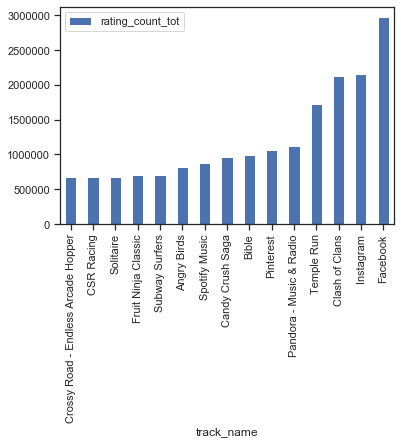

In [4]:
#TAR 4
df.sort_values(['rating_count_tot'])[-15:][['track_name', 'rating_count_tot']].set_index('track_name').plot(kind='bar')

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22810 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12502 missing from current

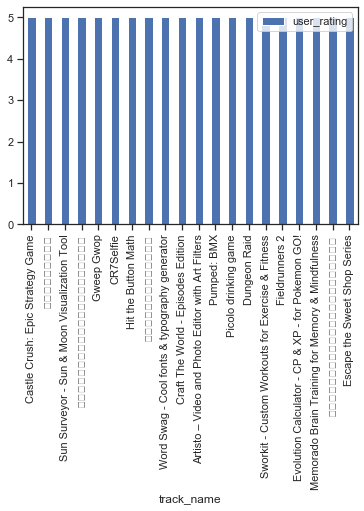

In [5]:
#TAR 5
df.sort_values(['user_rating'])[-20:][['track_name', 'user_rating']].set_index('track_name').plot(kind='bar')

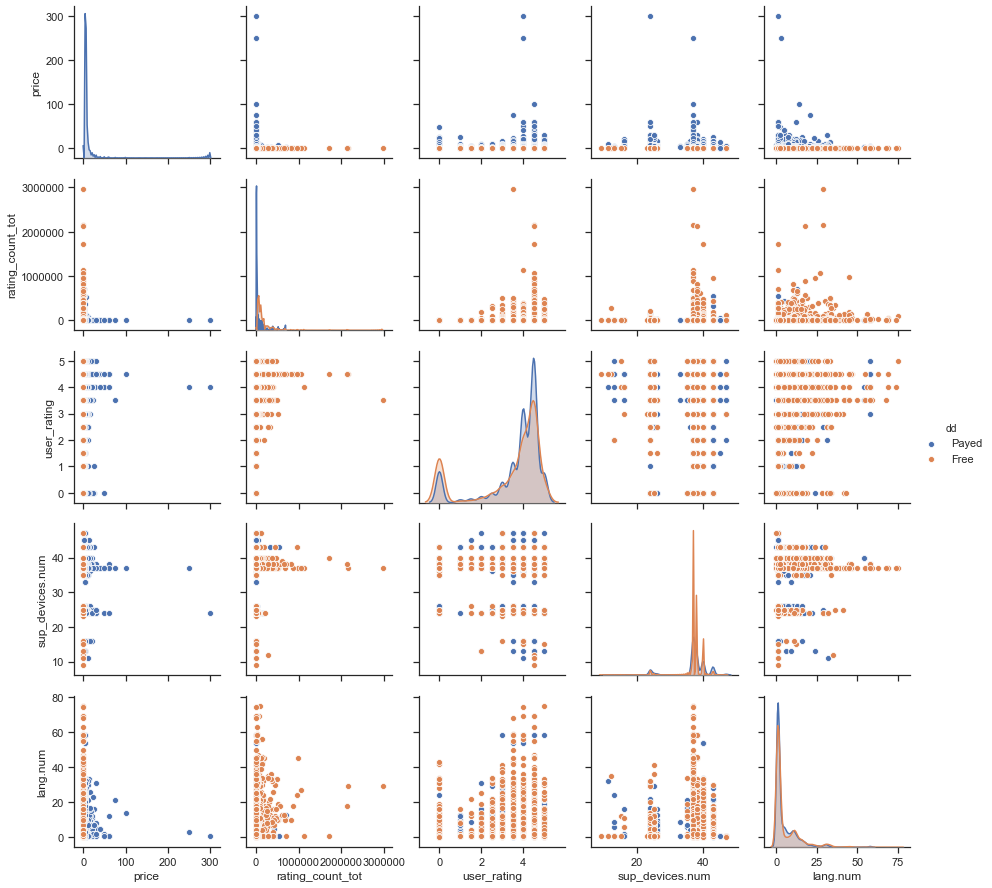

In [38]:
#Tar 6
dfPair = sns.load_dataset("iris")
dfFree = df[df['price'] == 0][['rating_count_tot', 'user_rating', 'prime_genre']]
dfPayed = df[df['price'] != 0][['rating_count_tot', 'user_rating', 'prime_genre']]
dfFree
dfPair
dfTmp = df.copy()
tt = ['Free' if x else 'Payed' for x in df['price'] == 0]
dfTmp['dd'] = tt
dfTmp
sns.pairplot(dfTmp[['dd', 'price', 'rating_count_tot', 'user_rating', 'sup_devices.num', 'lang.num']], hue="dd")

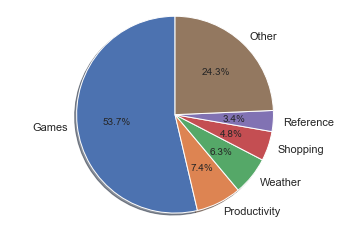

In [66]:
import matplotlib.pyplot as plt

sliceIndex = 5
labels = df['prime_genre'].unique()[:sliceIndex]
labels = np.append(labels, ["Other"])
sizes = df['prime_genre'].value_counts()[:sliceIndex]
sizes = np.append(sizes, [len(df)-df['prime_genre'].value_counts()[:sliceIndex].sum()])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()